# Notebook to compare/analyse mask

> **ACM (Auto Clear Mask)**: <font color=blue>cloud mask generated by EarthDailyAgro</font>

> **WQR (World Quality Reference)**: <font color=blue>Manual mask based on ACM mask correction by an operator </font>

> **SCL (Sentinel-2 L2A Scene Classification)**

### @author: Earth Daily Agro

In [1]:
from rasterio.session import AWSSession
import boto3
import pandas as pd
import numpy as np
from utils import *

AWS_ACCESS_KEY_ID = '*****'
AWS_SECRET_ACCESS_KEY = '*****'

boto3_session = boto3.session.Session(
    region_name='us-east-2',
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY
)

aws_session = AWSSession(requester_pays=True)

## Data on AWS S3
> **List available data on a dedicated bucket in AWS S3**

In [2]:
s3_client = boto3.client('s3', region_name='us-east-2',
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY)# bucket test

bucket_name = 'clear-mask-quality-comparer'

df = list_available_data(s3_client,bucket_name)
df

,dataset_name,ACM,WQR,tile,year,month,day,SCL
0,S2A_T14TQS_20220606_173103_UTM14,s3://clear-mask-quality-comparer/S2A_T14TQS_20...,s3://clear-mask-quality-comparer/S2A_T14TQS_20...,T14TQS,2022,6,6,s3://sentinel-s2-l2a/tiles/14/T/QS/2022/6/6/0/...
1,S2A_T14TQS_20220802_172108_UTM14,s3://clear-mask-quality-comparer/S2A_T14TQS_20...,s3://clear-mask-quality-comparer/S2A_T14TQS_20...,T14TQS,2022,8,2,s3://sentinel-s2-l2a/tiles/14/T/QS/2022/8/2/0/...
2,S2A_T15TUH_20230320_171021_UTM15,s3://clear-mask-quality-comparer/S2A_T15TUH_20...,s3://clear-mask-quality-comparer/S2A_T15TUH_20...,T15TUH,2023,3,20,s3://sentinel-s2-l2a/tiles/15/T/UH/2023/3/20/0...
3,S2A_T22LEH_20230301_133831_UTM22,s3://clear-mask-quality-comparer/S2A_T22LEH_20...,s3://clear-mask-quality-comparer/S2A_T22LEH_20...,T22LEH,2023,3,1,s3://sentinel-s2-l2a/tiles/22/L/EH/2023/3/1/0/...
4,S2B_T14TQS_20220728_172103_UTM14,s3://clear-mask-quality-comparer/S2B_T14TQS_20...,s3://clear-mask-quality-comparer/S2B_T14TQS_20...,T14TQS,2022,7,28,s3://sentinel-s2-l2a/tiles/14/T/QS/2022/7/28/0...
5,S2B_T30UYD_20230327_110639_UTM30,s3://clear-mask-quality-comparer/S2B_T30UYD_20...,s3://clear-mask-quality-comparer/S2B_T30UYD_20...,T30UYD,2023,3,27,s3://sentinel-s2-l2a/tiles/30/U/YD/2023/3/27/0...
6,S2B_T31TCJ_20230219_105009_UTM31,s3://clear-mask-quality-comparer/S2B_T31TCJ_20...,s3://clear-mask-quality-comparer/S2B_T31TCJ_20...,T31TCJ,2023,2,19,s3://sentinel-s2-l2a/tiles/31/T/CJ/2023/2/19/0...
7,S2B_T34UGA_20230317_093039_UTM34,s3://clear-mask-quality-comparer/S2B_T34UGA_20...,s3://clear-mask-quality-comparer/S2B_T34UGA_20...,T34UGA,2023,3,17,s3://sentinel-s2-l2a/tiles/34/U/GA/2023/3/17/0...


## Compute matrix confusion

### Mask SCL
> **Label 0** : `no_data`

> **Label 1,2,4,5,6,7** : `clear`

> **Label 3,8,9,10,11** : `cloud`


Analysis of ACM vs WQR: 
accuracy 80.0%, over cloud detection 2.0%, under cloud detection 18.0%


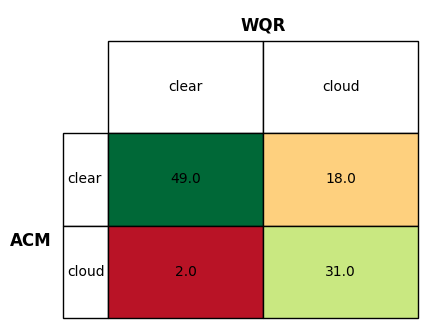

Analysis of SCL vs WQR: 
accuracy 71.0%, over cloud detection 2.0%, under cloud detection 28.0%


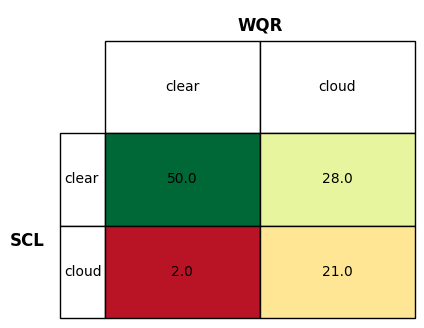

Analysis of SCL vs ACM: 
accuracy 87.0%, over cloud detection 2.0%, under cloud detection 12.0%


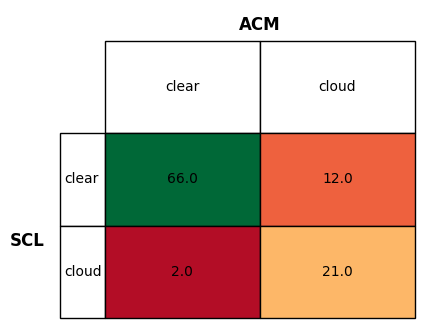

In [3]:
acm_vs_wqr, scl_vs_wqr, scl_vs_acm = compute_accuracy_from_df(df,aws_session)

#### Compute confusion matrix on a specific dataset

Analysis of ACM vs WQR: 
accuracy 73.0%, over cloud detection 1.0%, under cloud detection 26.0%


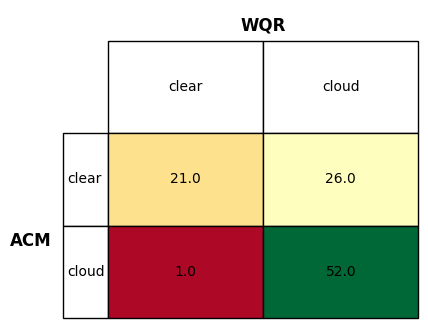

Analysis of SCL vs WQR: 
accuracy 59.0%, over cloud detection 0.0%, under cloud detection 41.0%


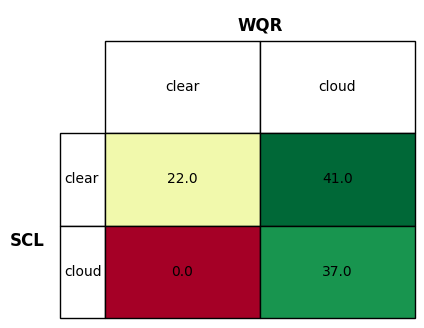

Analysis of SCL vs ACM: 
accuracy 83.0%, over cloud detection 0.0%, under cloud detection 16.0%


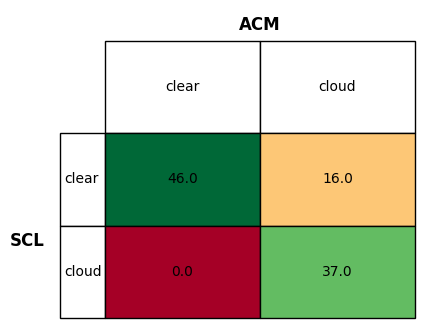

In [4]:
im = 3

acm_path = df['ACM'][im] # 's3://clear-mask-quality-comparer/S2B_T31TCJ_20230219_105009_UTM31/S2B_T31TCJ_20230219_105009_utm31_gs2_acm.tif'
scl_path = df['SCL'][im] # 's3://sentinel-s2-l2a/tiles/31/T/CJ/2023/2/19/0/R20m/SCL.jp2'
wqr_path = df['WQR'][im] # 's3://clear-mask-quality-comparer/S2B_T31TCJ_20230219_105009_UTM31/S2B_T31TCJ_20230219_105009_utm31_gs2_mask.tif'

acm_vs_wqr, scl_vs_wqr, scl_vs_acm = compute_accuracy_from_path(acm_path, scl_path, wqr_path, aws_session)

#### download data from AWS

In [5]:
# to download the reference mask
download_s3_files(wqr_path)

## Data on local
> **List available data on the local folder `\masks`**

In [6]:
df_local = list_available_local_data()
df_local

,dataset_name,ACM,WQR,SCL,tile,year,month,day
0,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,T14TQS,2022,6,6
1,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,T14TQS,2022,8,2
2,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,T15TUH,2023,3,20
3,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,T22LEH,2023,3,1
4,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,T14TQS,2022,7,28
5,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,T30UYD,2023,3,27
6,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,T31TCJ,2023,2,19
7,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,C:\Users\jpn\PycharmProjects\Demo_cloud_mask\m...,T34UGA,2023,3,17


## Compute matrix confusion

### Mask SCL
> **Label 0** : `no_data`

> **Label 1,2,4,5,6,7** : `clear`

> **Label 3,8,9,10,11** : `cloud`

Analysis of ACM vs WQR: 
accuracy 80.0%, over cloud detection 2.0%, under cloud detection 18.0%


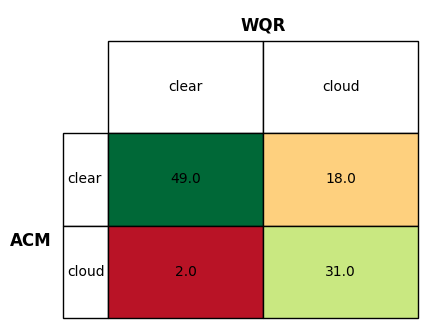

Analysis of SCL vs WQR: 
accuracy 71.0%, over cloud detection 2.0%, under cloud detection 28.0%


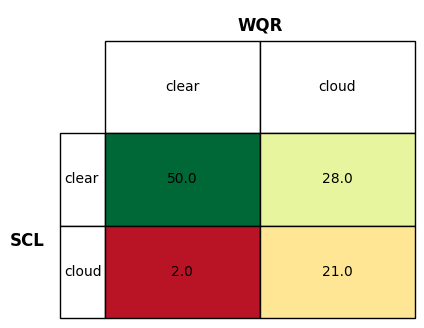

Analysis of SCL vs ACM: 
accuracy 87.0%, over cloud detection 2.0%, under cloud detection 12.0%


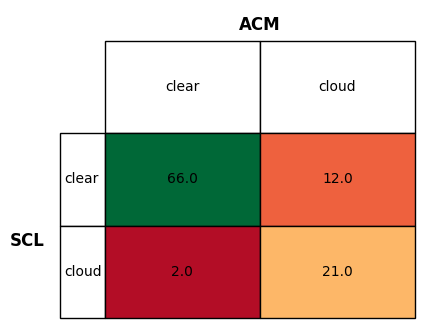

In [7]:
acm_vs_wqr, scl_vs_wqr, scl_vs_acm = compute_accuracy_from_df(df_local)

#### Compute confusion matrix on a specific dataset

Analysis of ACM vs WQR: 
accuracy 73.0%, over cloud detection 1.0%, under cloud detection 26.0%


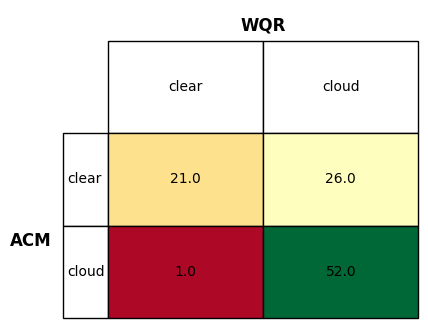

Analysis of SCL vs WQR: 
accuracy 59.0%, over cloud detection 0.0%, under cloud detection 41.0%


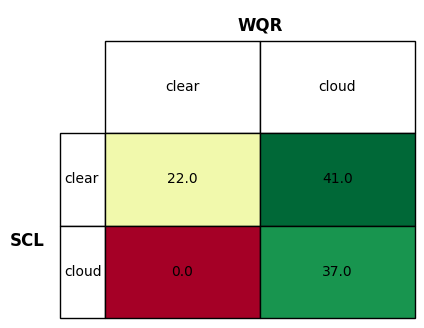

Analysis of SCL vs ACM: 
accuracy 83.0%, over cloud detection 0.0%, under cloud detection 16.0%


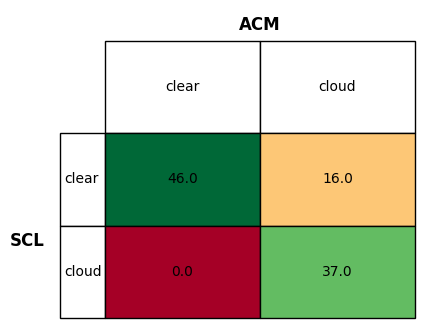

In [8]:
im = 3

acm_path = df_local['ACM'][im] 
scl_path = df_local['SCL'][im] 
wqr_path = df_local['WQR'][im] 

acm_vs_wqr, scl_vs_wqr, scl_vs_acm = compute_accuracy_from_path(acm_path, scl_path, wqr_path)